In [14]:
# initial setup for any notebook

%load_ext autoreload
%autoreload 2
import sys
sys.path.append("/home/yarcoh/projects/thesis-code4") # go to parent dir

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# imports

from src.general_methods.visualizer import Visualizer
from src.deep.data_analyzer import DataAnalyzer
from tqdm.notebook import tqdm

In [53]:
# configs

path = f'../../data/datasets/spectrum/qam16_150x50'
mu = 0.01
data_id = 0
n_permutations_for_ber = 20
is_box_plot = False

In [54]:
# load data
data_analyzer = DataAnalyzer(path, _tqdm=tqdm, is_box_plot=is_box_plot)

the folder ../../data/datasets/spectrum/qam16_150x50/150_samples_mu=0.012 contains 150 samples


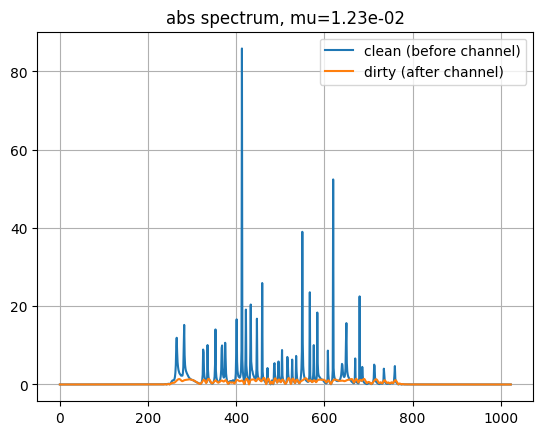

x_power=19.0738027129516
ber=0.35546875


In [55]:
# plot single sample
data_analyzer.plot_single_sample(mu=mu, data_id=data_id, is_save=False)

In [50]:
# upload to wandb single sample
data_analyzer.wandb_log_single_sample(mu=mu, data_id=data_id)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: yarden92. Use `wandb login --relogin` to force relogin


the folder ../../data/datasets/spectrum/qam16_150x20/150_samples_mu=0.0100 contains 150 samples
uploaded to wandb mu=0.01, i=0


  0%|          | 0/51 [00:00<?, ?it/s]

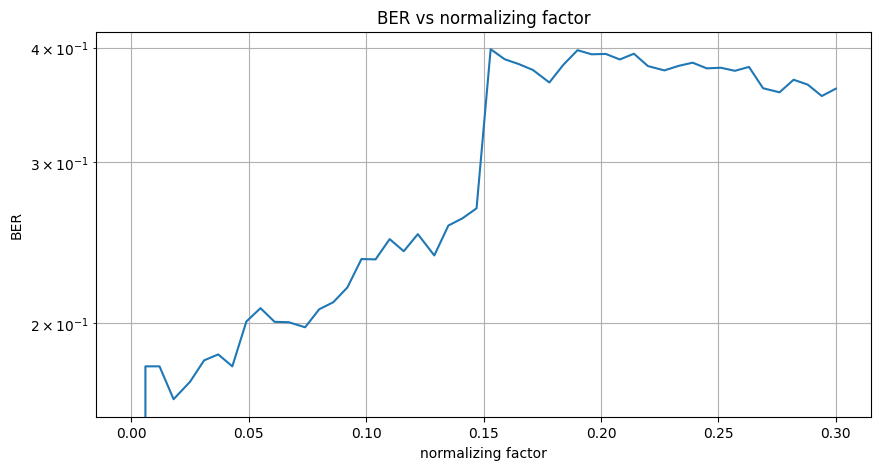

ber vs mu saved to ../../data/datasets/spectrum/qam16_150x50/_analysis/ber_vs_mu.png


In [56]:
# plot full ber graph
data_analyzer.plot_full_ber_graph(permute_limit=n_permutations_for_ber, is_save=False)

In [57]:
# upload to wandb full ber graph
data_analyzer.wandb_log_ber_vs_mu(n=n_permutations_for_ber)

In [63]:
# create grid of how many permutations we have in the dataset
import os
import numpy as np
import pandas as pd
from src.deep.data_analyzer import DataAnalyzer
from src.deep.data_methods import DataMethods, FolderTypes

root_dir = f'../../data/datasets/spectrum'

# scan all folders and separate names to qams, mus and num_permutations
qams_vec = []
mu_len_vec = []
num_permutations_vec = []
for dir in os.listdir(root_dir):
    if DataMethods.check_folder_type(dir) != FolderTypes.Data:
        continue
    da = DataAnalyzer(f'{root_dir}/{dir}')
    qam = da.params['conf']['m_qam']
    mu_len = da.params['num_mus']
    num_permutations = da.params['num_samples']
    
    qams_vec.append(qam)
    mu_len_vec.append(mu_len)
    num_permutations_vec.append(num_permutations)
    
# unique qams and mu_lens
unique_qams = np.unique(qams_vec)
unique_mu_lens = np.unique(mu_len_vec)

# create a grid
data_matrix = np.zeros((len(unique_mu_lens), len(unique_qams)))
for i, qam in enumerate(unique_qams):
    for j, mu_len in enumerate(unique_mu_lens):
        data_matrix[j, i] = num_permutations_vec[qams_vec.index(qam) + mu_len_vec.index(mu_len)]


# print the grid
print('heres the numpy values')
print(data_matrix)

# convert to dataframe
df = pd.DataFrame(data_matrix, index=unique_mu_lens, columns=unique_qams)


# print the grid
print(df)
